# **Classificação de imagens**

# **Estudante: Diógenes Wallis**

### Sobre o dataset

##### O dataset CIFAR-10 contem 60000 32x32 imagens coloridas em 10 classes, com 6000 imagens por classe. Existem 50000 imagens de treinamento e 10000 imagens de teste.  

## **Definições**:

### Arquitetura: escolheu-se a arquitetura LeNet-5, em que tem-se 2 camadas convolucionais, 2 de pooling, 3 camadas densas, 1 de flatten; mais detalhes abaixo: 

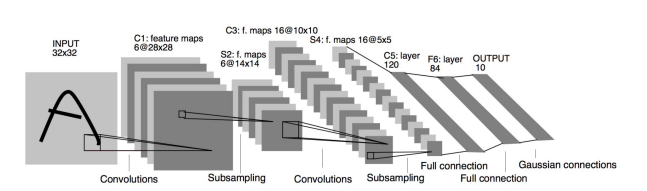

### Para facilitar, a arquitetura está resumida abaixo utilizando o método *summary* (por favor, checar comentários para detalhes):

In [ ]:
from tensorflow import keras

lenet_5_model = keras.models.Sequential([

    # Nesta primeira camada, tem-se 6 filtros de tamanho 5x5 e a convolução é realizada com o deslocamento de 1 stride.                
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32,32,3), padding='same'), #C1

    # O pooling é realizado varrendo a imagem, num stride de tamanho 2, com uma janela de tamanho 2x2 e calculando a média. 
    keras.layers.AveragePooling2D(), #S2

    # Nesta camada, tem-se 16 filtros de tamanho 5x5 e a convolução é realizada com o deslocamento de 1 stride.
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3

    # O pooling é realizado varrendo a imagem, num stride de tamanho 2, com uma janela de tamanho 2x2 e calculando a média.
    keras.layers.AveragePooling2D(), #S4

    # Convertendo as imagens em vetores de uma dimensão
    keras.layers.Flatten(), #Flatten

    # As camadas que seguem são camadas densas em que defini-se a função de ativação no parâmetro activation

    keras.layers.Dense(120, activation='tanh'), #C5

    keras.layers.Dense(84, activation='tanh'), #F6

    keras.layers.Dense(10, activation='softmax') #Output layer
])

lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## **Por fim**:

### Função de perda: *categorical crossentropy*

### Otimizador: otimizador *adam*

### Métrica de avaliação: acurácia

# **Experimentos**

## Carregando as bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

## **Existe alguma perda significativa ao utilizar apenas a escala de cinza?**

### Sem escala de cinza

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

#x_train = x_train/255.0
#x_test = x_test/255.0

x_val = x_train[:10000]
y_val = y_train[:10000]

In [ ]:
lenet_5_model = keras.models.Sequential([
                                         
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32,32,3), padding='same'), #C1

    keras.layers.AveragePooling2D(), #S2

    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3

    keras.layers.AveragePooling2D(), #S4

    keras.layers.Flatten(), #Flatten

    keras.layers.Dense(120, activation='tanh'), #C5

    keras.layers.Dense(84, activation='tanh'), #F6

    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
lenet_5_model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.6134 - accuracy: 0.4223 - val_loss: 1.3758 - val_accuracy: 0.5034
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3890 - accuracy: 0.5042 - val_loss: 1.3324 - val_accuracy: 0.5171
Epoch 3/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2982 - accuracy: 0.5373 - val_loss: 1.1776 - val_accuracy: 0.5761
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2375 - accuracy: 0.5603 - val_loss: 1.1461 - val_accuracy: 0.5970
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1865 - accuracy: 0.5769 - val_loss: 1.0835 - val_accuracy: 0.6152


In [ ]:
lenet_5_model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.2760 - accuracy: 0.5471


[1.276039719581604, 0.5471000075340271]

### Com escala de cinza

In [ ]:
x_train_gray_scale = tf.image.rgb_to_grayscale(x_train)
x_test_gray_scale = tf.image.rgb_to_grayscale(x_test)

assert x_train_gray_scale.shape == (50000, 32, 32, 1)
assert x_test_gray_scale.shape == (10000, 32, 32, 1)

x_val_gray_scale = x_train_gray_scale[:10000]

In [ ]:
lenet_5_model = keras.models.Sequential([
                                         
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32,32,1), padding='same'), #C1

    keras.layers.AveragePooling2D(), #S2

    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3

    keras.layers.AveragePooling2D(), #S4

    keras.layers.Flatten(), #Flatten

    keras.layers.Dense(120, activation='tanh'), #C5

    keras.layers.Dense(84, activation='tanh'), #F6

    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
lenet_5_model.fit(x_train_gray_scale, y_train, epochs=5, validation_data=(x_val_gray_scale, y_val))

Epoch 1/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.7069 - accuracy: 0.3895 - val_loss: 1.5403 - val_accuracy: 0.4546
Epoch 2/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4717 - accuracy: 0.4804 - val_loss: 1.3554 - val_accuracy: 0.5241
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3578 - accuracy: 0.5211 - val_loss: 1.2581 - val_accuracy: 0.5606
Epoch 4/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2851 - accuracy: 0.5490 - val_loss: 1.1464 - val_accuracy: 0.5954
Epoch 5/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2198 - accuracy: 0.5731 - val_loss: 1.1236 - val_accuracy: 0.6054


In [ ]:
lenet_5_model.evaluate(x_test_gray_scale, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.3609 - accuracy: 0.5313


[1.3609167337417603, 0.5313000082969666]

## **Resposta**:

### Comparando as avaliações, percebe-se que sem escala de cinza o resultado foi de 0.5471 de acurácia, enquanto que com escala de cinza foi de 0.5313. Vale mencionar que converter em escala de cinza torna o treinamento mais rápido.

### Os resultados indicam que converter para escala de cinza não ocasionou um aumento no poder discriminativo das features extraídas.

### Embora neste contexto as imagens em RGB tenham apresentado vantagem, em Bui et al [1], converter em escala de cinza melhorou a acurácia no processo de reconhecimento de objetos usando CNN.

### [1] H. M. Bui, M. Lech, E. Cheng, K. Neville and I. S. Burnett, "Using grayscale images for object recognition with convolutional-recursive neural network," 2016 IEEE Sixth International Conference on Communications and Electronics (ICCE), 2016, pp. 321-325, doi: 10.1109/CCE.2016.7562656.

## **Qual impacto de mudar a normalização de [0:255] para [0.0: 1.0]?**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

x_train = x_train/255.0
x_test = x_test/255.0

x_val = x_train[:10000]
y_val = y_train[:10000]

In [ ]:
lenet_5_model = keras.models.Sequential([
                                         
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32,32,3), padding='same'), #C1

    keras.layers.AveragePooling2D(), #S2

    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3

    keras.layers.AveragePooling2D(), #S4

    keras.layers.Flatten(), #Flatten

    keras.layers.Dense(120, activation='tanh'), #C5

    keras.layers.Dense(84, activation='tanh'), #F6

    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

lenet_5_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_19 (Dense)             (None, 84)               

In [ ]:
lenet_5_model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.7645 - accuracy: 0.3777 - val_loss: 1.5896 - val_accuracy: 0.4379
Epoch 2/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5184 - accuracy: 0.4635 - val_loss: 1.4002 - val_accuracy: 0.4999
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3963 - accuracy: 0.5059 - val_loss: 1.2843 - val_accuracy: 0.5492
Epoch 4/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.3179 - accuracy: 0.5322 - val_loss: 1.2043 - val_accuracy: 0.5782
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2615 - accuracy: 0.5541 - val_loss: 1.1739 - val_accuracy: 0.5825


In [ ]:
lenet_5_model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.3561 - accuracy: 0.5175


[1.3561474084854126, 0.5174999833106995]

## **Resposta**
 
### Considerando as imagens em RGB, a acurácia foi de 0.5471 para 0.5175 após a normalização dos dados de 0-255 para 0-1. A normalização resulta em uma piora significativa.
 
### Apesar do resultado, o processo de normalização, em tarefas de visão computacional, é extremamente comum. Existem várias formas de fazer a normalização, algumas delas consistem em normalizar de -1 a 1 e de 0 a 1, como foi feito neste contexto.
 
### O motivo de normalizar os dados está ligado ao cálculo do gradiente dos pesos da rede, sem reduzir os valores da imagem, a magnitude do gradiente pode assumir valores diferentes ao longo de um mesmo batch de dados. A normalização reduz essa diferença e torna mais fácil o processo de escolha da taxa de aprendizagem que está atrelada a magnitude [2].
 
### [2] Normalization in Deep Learning - https://arthurdouillard.com/post/normalization/

## **Qual impacto de aumentar/diminuir o número de camadas convolucional?**

### diminuindo o numero de camadas convolucionais

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

x_train = x_train/255.0
x_test = x_test/255.0

x_val = x_train[:10000]
y_val = y_train[:10000]

In [ ]:
lenet_5_model_remove = keras.models.Sequential([
                                         
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32,32,3), padding='same'), #C1

    keras.layers.AveragePooling2D(), #S2

    keras.layers.Flatten(), #Flatten

    keras.layers.Dense(120, activation='tanh'), #C5

    keras.layers.Dense(84, activation='tanh'), #F6

    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model_remove.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

lenet_5_model_remove.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 16, 16, 6)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               184440    
_________________________________________________________________
dense_22 (Dense)             (None, 84)                10164     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                850       
Total params: 195,910
Trainable params: 195,910
Non-trainable params: 0
________________________________________________

In [ ]:
lenet_5_model_remove.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6989 - accuracy: 0.3933 - val_loss: 1.5007 - val_accuracy: 0.4619
Epoch 2/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4495 - accuracy: 0.4865 - val_loss: 1.3796 - val_accuracy: 0.5046
Epoch 3/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.3503 - accuracy: 0.5200 - val_loss: 1.2457 - val_accuracy: 0.5635
Epoch 4/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.2810 - accuracy: 0.5447 - val_loss: 1.2089 - val_accuracy: 0.5651
Epoch 5/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.2210 - accuracy: 0.5660 - val_loss: 1.1152 - val_accuracy: 0.6057


In [ ]:
lenet_5_model_remove.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.3719 - accuracy: 0.5185


[1.3718639612197876, 0.5184999704360962]

## **Resposta**
 
### Conforme pode-se observar, a acurácia foi de 0.5471 (RGB e sem normalização) para 0.5185, resultando em uma piora.
 
### Nesta etapa, removeu-se uma das camadas convolucionais, bem como a camada de pooling logo em seguida, restando assim apenas uma camada convolucional. Isso reduz o tamanho do modelo e o tempo de treinamento.
 
### Embora o efeito tenha sido negativo, em alguns contextos como em [3], a remoção pode ocasionar em aumento da acurácia. Remover uma camada convolucional implica em menos chances de overfitting, porém existe um trade-off e um número muito reduzido pode causar um viés na classificação.
 
### [3] Allday, Rebecca & Hadfield, Simon & Bowden, Richard. (2017). From Vision to Grasping: Adapting Visual Networks. 484-494. 10.1007/978-3-319-64107-2_38.

### Aumentando o numero de camadas convolucionais

In [ ]:
lenet_5_model_add = keras.models.Sequential([
                                         
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32,32,3), padding='same'), #C1

    keras.layers.AveragePooling2D(), #S2

    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3

    keras.layers.AveragePooling2D(), #S4

    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='tanh', padding='valid'), #C3

    keras.layers.AveragePooling2D(), #S4

    keras.layers.Flatten(), #Flatten

    keras.layers.Dense(120, activation='tanh'), #C5

    keras.layers.Dense(84, activation='tanh'), #F6

    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model_add.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_16 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
average_pooling2d_17 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 128)              

In [ ]:
lenet_5_model_add.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
lenet_5_model_add.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.8092 - accuracy: 0.3543 - val_loss: 1.6552 - val_accuracy: 0.4192
Epoch 2/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5651 - accuracy: 0.4407 - val_loss: 1.4439 - val_accuracy: 0.4771
Epoch 3/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4248 - accuracy: 0.4884 - val_loss: 1.3572 - val_accuracy: 0.5095
Epoch 4/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.3365 - accuracy: 0.5212 - val_loss: 1.2757 - val_accuracy: 0.5409
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2780 - accuracy: 0.5429 - val_loss: 1.1968 - val_accuracy: 0.5751


In [ ]:
lenet_5_model_add.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.2931 - accuracy: 0.5447


[1.2931140661239624, 0.544700026512146]

## **Resposta**

### Conforme pode-se observar, a acurácia foi de 0.5471 (RGB e sem normalização) para 0.5447, resultando em uma diferença mínima.

### Nesta etapa, foi adicionada uma camada convolucional com 32 filtros de tamanho 3x3, bem como uma camada de pooling logo em seguida.

### Embora o efeito tenha sido mínimo, em alguns trabalhos como em [3], a adição de camadas pode ser ruim para o modelo. Aumentar o número de camadas também aumenta as chances de overfitting. Porém, aumentar ou diminuir deve ser baseado nas características dos dados de entrada, na quantidade, no número de classes.

### [3] Allday, Rebecca & Hadfield, Simon & Bowden, Richard. (2017). From Vision to Grasping: Adapting Visual Networks. 484-494. 10.1007/978-3-319-64107-2_38.

## **Qual diferença se utilizarmos um vetor 1D (3072) no lugar da imagem (32x32x3)?**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.flatten().reshape(50000, 3072)
x_test = x_test.flatten().reshape(10000, 3072)

x_val = x_train[:10000]
y_val = y_train[:10000]

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
lenet_5_model_vector = keras.models.Sequential([

    keras.layers.Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'),                            

    keras.layers.Dense(120, activation='tanh'), #C5

    keras.layers.Dense(84, activation='tanh'), #F6

    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model_vector.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_28 (Dense)             (None, 120)               15480     
_________________________________________________________________
dense_29 (Dense)             (None, 84)                10164     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                850       
Total params: 419,838
Trainable params: 419,838
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lenet_5_model_vector.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
lenet_5_model_vector.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8886 - accuracy: 0.3123 - val_loss: 1.7430 - val_accuracy: 0.3698
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7015 - accuracy: 0.3881 - val_loss: 1.6157 - val_accuracy: 0.4151
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6302 - accuracy: 0.4137 - val_loss: 1.5896 - val_accuracy: 0.4358
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5788 - accuracy: 0.4358 - val_loss: 1.5134 - val_accuracy: 0.4574
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5466 - accuracy: 0.4464 - val_loss: 1.4876 - val_accuracy: 0.4591


In [ ]:
lenet_5_model_vector.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5427 - accuracy: 0.4482


[1.5427459478378296, 0.448199987411499]

## **Resposta**:
### Conforme pode-se observar, a acurácia foi de 0.5471 (RGB e sem normalização) para 0.4482, resultando em uma piora considerável.
### Nesta etapa, removeram-se as camadas convolucionais e manteve-se apenas as camadas densas. Também foi realizado um pré-processamento para converter as imagens em vetores unidimensionais.
### O CNN se mostra mais efetivo para tarefas de visão computacional, visto que possibilita a redução da dimensionalidade dos dados de entrada através do processo de convolução com os respectivos filtros, tudo isso sem perder as informações das imagens [4]. Já o uso de apenas camadas densas aparenta não conseguir extrair as características da imagem de maneira tão eficiente quanto as redes neurais convolucionais.
### [4] Why are Convolutional Neural Networks good for image classification? - https://medium.datadriveninvestor.com/why-are-convolutional-neural-networks-good-for-image-classification-146ec6e865e8
 
 


## **Referências referentes ao código** 

https://keras.io/api/datasets/cifar10/

https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342

https://www.tensorflow.org/api_docs/python/tf/image/rgb_to_grayscale

# **Atividade extra**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

x_train = x_train/255.0
x_test = x_test/255.0

x_val = x_train[:10000]
y_val = y_train[:10000]

model = keras.models.Sequential([
                                         
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32,32,3), padding='same'), #C1

    keras.layers.AveragePooling2D(), #S2

    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3

    keras.layers.AveragePooling2D(), #S4

    keras.layers.Flatten(), #Flatten

    keras.layers.Dense(120, activation='tanh'), #C5

    keras.layers.Dense(84, activation='tanh'), #F6

    keras.layers.Dense(10, activation='softmax') #Output layer
])


model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_17 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_29 (Dense)             (None, 84)               

In [ ]:
for layer in model.layers:
    print(layer.name)

conv2d_16
average_pooling2d_16
conv2d_17
average_pooling2d_17
flatten_8
dense_28
dense_29
dense_30


In [ ]:
layer_name = 'dense_29'

selected_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)

selected_output = selected_layer_model(x_test)

In [ ]:
selected_output.shape

TensorShape([10000, 84])

In [ ]:
selected_output[23]

<tf.Tensor: shape=(84,), dtype=float32, numpy=
array([-0.55497116,  0.9814193 , -0.8700548 ,  0.9975715 , -0.98472685,
        0.992931  , -0.99978226, -0.8026414 ,  0.23004277,  0.7227897 ,
        0.96533024,  0.99970496, -0.5667163 , -0.6686141 ,  0.4001381 ,
       -0.91777605,  0.9499689 ,  0.9966938 , -0.96086305,  0.7888531 ,
        0.9825669 ,  0.91993403,  0.99170005, -0.9844677 ,  0.93692476,
        0.88319486,  0.66013926,  0.99781567, -0.5563827 ,  0.88152736,
       -0.24920514, -0.7103461 ,  0.9887774 , -0.8455412 ,  0.58627546,
       -0.98153096,  0.9820312 , -0.999903  , -0.932295  ,  0.9922124 ,
       -0.8816221 , -0.8277271 , -0.84806585,  0.9980789 , -0.75040466,
        0.2089395 ,  0.7459466 , -0.9994766 ,  0.27864897, -0.31716436,
        0.9996393 , -0.9588952 , -0.9825183 , -0.9992239 ,  0.96961296,
        0.9886527 ,  0.9973089 , -0.37774137, -0.94243747, -0.99949557,
       -0.90547776,  0.7302642 , -0.9996633 , -0.9323538 , -0.5602763 ,
        0.9899624

In [ ]:
y_test[23]

array([9], dtype=uint8)

Populating the interactive namespace from numpy and matplotlib


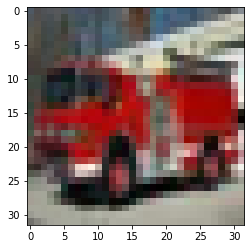

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = x_test[23]
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from numpy import linalg as LA

dst = []

for i in selected_output:
  if all(tf.math.equal(i,selected_output[23])) == False:

    dst.append(LA.norm(i - selected_output[23]),)

In [ ]:
#O ID 23 foi removido na hora de calcular as distancias, por conta disso sera adicionado o valor de 1 para os indices abaixo.
print("ID mais similar: ",dst.index(min(dst))+1)
print("ID mais dissimilar: ",dst.index(max(dst))+1)

ID mais similar:  940
ID mais dissimilar:  1968


In [ ]:
labels = {0:"airplane", 1:"automobile", 2:"bird",
3:"cat", 4:"deer", 5:"dog", 6:"frog",
7:"horse", 8:"ship", 9:"truck"}

Text(0.5, 1.0, 'First dissimilar - 1968 ship\n12.909873')

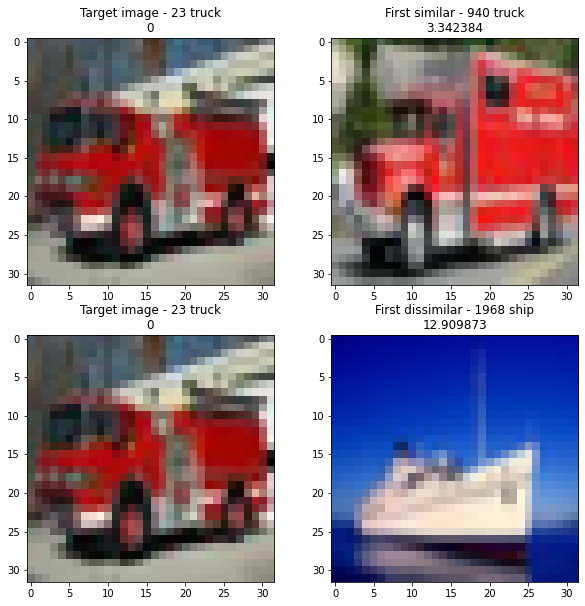

In [ ]:
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(x_test[23])

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(x_test[940])

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(x_test[23])

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(x_test[1968])

ax1.set_title('Target image - 23 ' +str(labels[y_test[23][0]])+"\n" + str(0))
ax2.set_title('First similar - '+ str(dst.index(min(dst))+1) + " " + str(labels[y_test[dst.index(min(dst))+1][0]])+"\n" + str(min(dst)))

ax3.set_title('Target image - 23 '+str(labels[y_test[23][0]])+"\n" + str(0))
ax4.set_title('First dissimilar - '+ str(dst.index(max(dst))+1)+ " " + str(labels[y_test[dst.index(max(dst))+1][0]])+"\n" + str(max(dst)))